In [1]:
!git pull

Updating 239d5554..f57acefaFrom https://github.com/thekhan314/CrudeOilApp
   239d5554..f57acefa  master     -> origin/master

Fast-forward
 __pycache__/common.cpython-36.pyc             | Bin 0 -> 239 bytes
 __pycache__/data_functions.cpython-36.pyc     | Bin 0 -> 6961 bytes
 bash_update                                   |   7 +++++++
 common.py                                     |   4 ++++
 data_functions.py                             |  10 ++++++----
 data_update_script.py                         |  14 +++++++-------
 datashop/__pycache__/__init__.cpython-36.pyc  | Bin 375 -> 375 bytes
 datashop/__pycache__/dataframe.cpython-36.pyc | Bin 1905 -> 1905 bytes
 datashop/__pycache__/datashop.cpython-36.pyc  | Bin 13086 -> 13086 bytes
 datashop/__pycache__/feature.cpython-36.pyc   | Bin 6762 -> 6762 bytes
 datashop/__pycache__/imports.cpython-36.pyc   | Bin 1028 -> 1028 bytes
 11 files changed, 24 insertions(+), 11 deletions(-)
 create mode 100644 __pycache__/common.cpython-36.pyc
 creat

In [16]:
!git add .
!git commit -m "yann fixed the cron but the latest news wont load?"
!git push


The file will have its original line endings in your working directory
[master c25301a2] yann fixed the cron but the latest news wont load?
 1 file changed, 5 insertions(+), 5 deletions(-)
To https://github.com/thekhan314/CrudeOilApp.git
   8dff7125..c25301a2  master -> master


In [2]:
from data_functions import *
import math
import datetime as dt
import sqlite3
import pandas as pd

from datashop import *

path = 'c:/prompt_root/CrudeOilApp'
relpath = '/data/nyt_api/nyt_jsons/'

conn = sqlite3.connect('data/energydash.db')

eia_dict = {
    'PET.WTTSTUS1.W':['WeeklyStocks','235081','%Y%m%d'],
    'PET.RWTC.D':['DailyPrice','241335','%Y%m%d'],
    'PET.WRPUPUS2.W':['ProductSupplied','401676','%Y%m%d'],
    'PET.E_ERTRRO_XR0_NUS_C.M':['MonthlyRigCount','296749','%Y%m']
}

#test_bulk = jsons_to_frame(path,relpath,conn)
#test_bulk.to_csv('data/nyt_api/nyt_articles.csv')

In [4]:
# Lates News
last_archive_date= "2020-11-05 17:54:49.445231"	
end_date = str(dt.datetime.now())

query = 'Oil (Petroleum) and Gasoline'

recents_call = nytResp(last_archive_date,end_date,query)

In [5]:
recents_call.frame

,id,Date,date_only,abstract,doc_type,main_headline,keywords,newsdesk,url,retrieved
0,nyt://article/3700d15f-8708-51a9-8c90-a71fe280...,2020-11-05 08:00:11,2020-11-05,Environmental groups argue that exploratory dr...,article,Norway’s Supreme Court Hears Rights Challenge ...,"[{'name': 'glocations', 'value': 'Norway', 'ra...",Foreign,https://www.nytimes.com/2020/11/05/world/europ...,2020-11-11 15:34:40.359680
1,nyt://article/64313d07-de22-5b8b-9216-8175c206...,2020-11-11 10:00:32,2020-11-11,The fuel could play an important role in fight...,article,California Is Trying to Jump-Start the Hydroge...,"[{'name': 'subject', 'value': 'Automobiles', '...",Business,https://www.nytimes.com/2020/11/11/business/hy...,2020-11-11 15:34:40.359680
2,nyt://article/562aed49-c6c8-5ce4-9962-f4a1bbee...,2020-11-11 19:10:13,2020-11-11,Amid growing alarm about methane’s role in dri...,article,New Technology Claims to Pinpoint Even Small M...,"[{'name': 'subject', 'value': 'Global Warming'...",Climate,https://www.nytimes.com/2020/11/11/climate/met...,2020-11-11 15:34:40.359680


In [3]:
# CHeck how many tables in db
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('WeeklyStocks',), ('DailyPrice',), ('ProductSupplied',), ('MonthlyRigCount',), ('news',)]


In [9]:
# Last items in news
query = " SELECT * FROM news ORDER BY Date DESC LIMIT 100"
df = pd.read_sql(query,conn)
df = df[['Date','abstract','WeeklyStocks','DIA_closing','DailyPrice','ProductSupplied','id']]

display(df)

,Date,abstract,WeeklyStocks,DIA_closing,DailyPrice,ProductSupplied,id
0,2020-11-11 22:06:25,"FTI, a global consulting firm, helped design, ...",2003775.0,294.05,41.23,20180.0,nyt://article/9291f3f2-877e-5112-b575-875ccfe4...
1,2020-11-11 19:10:13,Amid growing alarm about methane’s role in dri...,2003775.0,294.05,41.23,20180.0,nyt://article/562aed49-c6c8-5ce4-9962-f4a1bbee...
2,2020-11-11 10:00:32,The fuel could play an important role in fight...,2003775.0,294.05,41.23,20180.0,nyt://article/64313d07-de22-5b8b-9216-8175c206...
3,2020-11-05 08:00:11,Environmental groups argue that exploratory dr...,2003775.0,294.05,41.23,20180.0,nyt://article/3700d15f-8708-51a9-8c90-a71fe280...
4,2020-11-01 18:53:20,How a yearslong battle over U.S.-Venezuela rel...,2003775.0,294.05,41.23,20180.0,nyt://article/542669b0-b3cb-5b5b-8870-53247d68...
...,...,...,...,...,...,...,...
95,2020-05-01 09:00:28,"For over a decade, the Permian Basin has been ...",2033262.0,237.28,19.72,15354.0,nyt://article/55da7777-f837-53dd-ba94-3907b476...
96,2020-04-30 09:00:15,"I want us to pursue paths to cleaner, renewabl...",2013630.0,243.22,19.23,15763.0,nyt://article/08815e67-8eb6-5156-9e3d-1d62bf51...
97,2020-04-28 13:00:13,Corpus Christi has become the largest energy e...,2013630.0,241.09,12.40,15763.0,nyt://article/aebc25dc-b399-5178-be0f-9584c822...
98,2020-04-27 10:00:05,This is the energy crisis nobody saw coming.,2013630.0,241.32,12.17,15763.0,nyt://article/4a381b6f-5bda-58a8-ba5b-05a46143...


In [5]:
df.columns

Index(['Date', 'abstract', 'WeeklyStocks', 'DailyPrice', 'ProductSupplied',
       'MonthlyRigCount'],
      dtype='object')

In [6]:
import matplotlib.pyplot as plt

,Date,DailyPrice,date_only
0,2020-04-01 00:00:00,20.28,2020-04-01
1,2020-04-02 00:00:00,25.18,2020-04-02
2,2020-04-03 00:00:00,28.36,2020-04-03
3,2020-04-06 00:00:00,26.21,2020-04-06
4,2020-04-07 00:00:00,23.54,2020-04-07
...,...,...,...
95,2020-08-14 00:00:00,42.05,2020-08-14
96,2020-08-17 00:00:00,42.89,2020-08-17
97,2020-08-18 00:00:00,42.89,2020-08-18
98,2020-08-19 00:00:00,42.91,2020-08-19


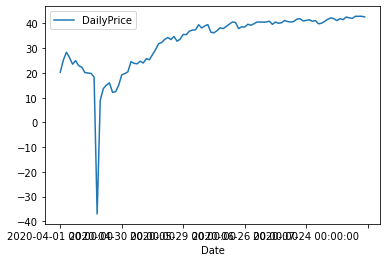

In [7]:
query = " SELECT * FROM DailyPrice WHERE Date > '2020-04-01' ORDER BY Date ASC LIMIT 100"
df = pd.read_sql(query,conn)
df.plot(x='Date',y='DailyPrice')

display(df)

In [ ]:
for key,val in eia_dict.items():
    query = " SELECT * FROM {} ORDER BY Date DESC LIMIT 10".format(val[0])
    df = pd.read_sql(query,conn)
    print(df)

In [ ]:
conn.commit()
conn.close()

In [27]:
test = EIA_Series('PET.RWTC.D')`

In [28]:
test.request.status_code

200

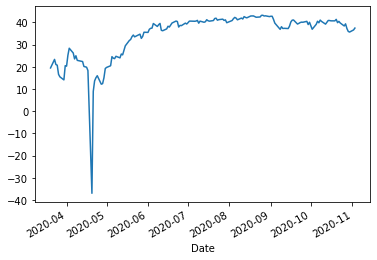

In [19]:
test.series['2020-03-20':'2020-11-04'].plot()

# Alpha Vantage

In [20]:
import requests
import json
key = 'SW0SNXDURLOZJJ55'

In [87]:
# Daily Adjusted from 2000 to 2020

url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=DIA&outputsize=full&apikey=' + key

request = requests.get(url)

req_dict = json.loads(request.text)

df = pd.DataFrame.from_dict(req_dict['Time Series (Daily)'],orient = 'index')
df = df.rename(columns={'4. close':'Close'})
df['Date'] = df.index
df['date_only'] = df['Date']
df['Date'] = df['Date'].apply(lambda x: x + ' 16:00:00')
df.set_index('Date',inplace=True)
df.sort_index()
df = df[df.index < '2020-10-05']
df[['date_only','Close']].to_sql('DIA',conn,if_exists='replace')


In [12]:
last_archive_date= '2020-10-26'	
end_date = str(dt.datetime.now())

query = 'Oil (Petroleum) and Gasoline'

recents_call = nytResp(last_archive_date,end_date,query)

print(recents_call.first_response)

{'status': 'OK', 'copyright': 'Copyright (c) 2020 The New York Times Company. All Rights Reserved.', 'response': {'docs': [{'abstract': 'Environmental groups argue that exploratory drilling licenses violate a constitutional right to a healthy environment. It’s a test case taking on an industry that is key to the country’s economy.', 'web_url': 'https://www.nytimes.com/2020/11/05/world/europe/norway-supreme-court-climate-change.html', 'snippet': 'Environmental groups argue that exploratory drilling licenses violate a constitutional right to a healthy environment. It’s a test case taking on an industry that is key to the country’s economy.', 'lead_paragraph': 'OSLO, Norway — The Norwegian Constitution declares that all citizens have the right to a healthy environment. But Norway’s economy is built around an oil and gas industry that accounts for more than half of national exports.', 'print_section': 'A', 'print_page': '7', 'source': 'The New York Times', 'multimedia': [{'rank': 0, 'subty

In [106]:
query = 'SELECT * FROM DIA'
df_2 = pd.read_sql(query,conn)

df_2['DIA_closing'] = df_2['DIA_closing'].astype('float')
df_2.set_index('Date',inplace=True)
df_2.index = pd.to_datetime(df_2.index)
df_2.sort_index(inplace=True)

In [4]:
query = " SELECT MAX(Date) FROM DIA LIMIT 1"
last_dia_date = conn.execute(query).fetchall()[0][0]
print(last_dia_date)

2020-10-29 16:00:00


# Intra Day

In [7]:
# IntraDay 15 min DIA
key = 'SW0SNXDURLOZJJ55'
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=DIA&interval=15min&outputsize=full&apikey=' + key

request = requests.get(url)

req_dict = json.loads(request.text)

df = pd.DataFrame.from_dict(req_dict['Time Series (15min)'],orient = 'index')
df = df.rename(columns={'4. close':'DIA_closing'})
df['Date'] = df.index
df['date_only'] = df['Date'].str.slice(stop=10)
df.set_index('Date',inplace=True)
df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)
df = df.rename(columns={'4. close':'DIA_closing'})

df = df[df.index > last_dia_date][['date_only','DIA_closing']]


#df.to_sql('DIA',conn,if_exists='append')


In [9]:
print(df)

                      date_only DIA_closing
Date                                       
2020-10-29 16:15:00  2020-10-29    265.8700
2020-10-29 16:30:00  2020-10-29    265.7500
2020-10-29 16:45:00  2020-10-29    265.0600
2020-10-29 17:00:00  2020-10-29    264.5000
2020-10-29 17:15:00  2020-10-29    264.1100
...                         ...         ...
2020-11-06 17:00:00  2020-11-06    283.5500
2020-11-06 17:15:00  2020-11-06    283.7500
2020-11-06 17:30:00  2020-11-06    283.7300
2020-11-06 19:30:00  2020-11-06    283.8900
2020-11-06 20:00:00  2020-11-06    283.8500

[372 rows x 2 columns]


In [74]:
df3.to_sql('DIA', conn, if_exists='append')

In [26]:
last_archive_date = "2020-10-26T10:00:00"	
end_date = str(dt.datetime.now())
#end_date = str(dt.datetime.now())

query = 'Oil (Petroleum) and Gasoline'

recents_call = nytResp(last_archive_date,end_date,query)

In [10]:
recents_call.last_response.

,id,Date,date_only,abstract,doc_type,main_headline,keywords,newsdesk,url,retrieved
0,nyt://article/3700d15f-8708-51a9-8c90-a71fe280...,2020-11-05 08:00:11,2020-11-05,Environmental groups argue that exploratory dr...,article,Norway’s Supreme Court Hears Rights Challenge ...,"[{'name': 'glocations', 'value': 'Norway', 'ra...",Foreign,https://www.nytimes.com/2020/11/05/world/europ...,2020-11-08 01:21:57.888045
1,nyt://article/9dfacd69-13ef-52c3-9117-95632d35...,2020-10-30 08:03:10,2020-10-30,"Canada’s oil patch has nearly 100,000 suspende...",article,These Zombies Threaten the Whole Planet,"[{'name': 'glocations', 'value': 'ALBERTA (CAN...",Climate,https://www.nytimes.com/2020/10/30/climate/oil...,2020-11-08 01:21:57.888045
2,nyt://article/542669b0-b3cb-5b5b-8870-53247d68...,2020-11-01 18:53:20,2020-11-01,How a yearslong battle over U.S.-Venezuela rel...,article,"Trump, Venezuela and the Tug-of-War Over a Str...","[{'name': 'subject', 'value': 'Presidential El...",Investigative,https://www.nytimes.com/2020/11/01/us/trump-ve...,2020-11-08 01:21:57.888045
3,nyt://article/2c2f4778-3f07-5409-95eb-7577516d...,2020-10-29 18:10:13,2020-10-29,Readers discuss Joe Biden’s debate comment abo...,article,Transitioning From Fossil Fuels,"[{'name': 'subject', 'value': 'Alternative and...",Letters,https://www.nytimes.com/2020/10/29/opinion/let...,2020-11-08 01:21:57.888045
4,nyt://article/18ec780b-c5ed-5f91-9986-f1548fa9...,2020-10-26 22:45:08,2020-10-26,The Trump administration is trying to fortify ...,article,U.S. Imposes Sanctions on Iran’s Oil Sector,"[{'name': 'subject', 'value': 'Embargoes and S...",Washington,https://www.nytimes.com/2020/10/26/world/middl...,2020-11-08 01:21:57.888045


In [ ]:
WHERE DIA.Date > ? AND DIA.Date < ? ORDER BY DIA.Date ASC 

,params=params

In [5]:
from datetime import datetime,timedelta

query ='SELECT Date, DIA_closing FROM DIA WHERE DIA.Date > ? ORDER BY DIA.Date ASC '
start_date = str(datetime.now() - timedelta(90))[:10]
params = (start_date,)
conn = sqlite3.connect('data/energydash.db')
df = pd.read_sql(query,conn,params=params)

In [15]:

            
query = 'SELECT Date, DIA_closing FROM DIA'
conn = sqlite3.connect('data/energydash.db')
df = pd.read_sql(query,conn)
conn.close()

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True, drop=True)
df.sort_index(inplace= True)
df = df[start_date:]
df['DIA_closing'] = min_max_col(df['DIA_closing'])

In [6]:
print(df)

                    Date DIA_closing
0    2020-08-10 16:00:00    278.1400
1    2020-08-11 16:00:00    277.1900
2    2020-08-12 16:00:00    280.0400
3    2020-08-13 16:00:00    279.4200
4    2020-08-14 16:00:00    279.8000
..                   ...         ...
652  2020-11-06 17:00:00    283.5500
653  2020-11-06 17:15:00    283.7500
654  2020-11-06 17:30:00    283.7300
655  2020-11-06 19:30:00    283.8900
656  2020-11-06 20:00:00    283.8500

[657 rows x 2 columns]


In [ ]:
queries ={
                'DailyPrice':'SELECT Date, DailyPrice FROM DailyPrice WHERE DailyPrice.Date > ? AND DailyPrice.Date < ?ORDER BY DailyPrice.Date ASC ',
                'WeeklyStocks':'SELECT Date, WeeklyStocks FROM WeeklyStocks WHERE WeeklyStocks.Date > ? AND WeeklyStocks.Date < ? ORDER BY WeeklyStocks.Date ASC ',
                'ProductSupplied':'SELECT Date, ProductSupplied FROM ProductSupplied WHERE ProductSupplied.Date > ? AND ProductSupplied.Date < ? ORDER BY ProductSupplied.Date ASC ',
                'MonthlyRigCount':'SELECT Date, MonthlyRigCount FROM MonthlyRigCount WHERE MonthlyRigCount.Date > ? AND MonthlyRigCount.Date < ? ORDER BY MonthlyRigCount.Date ASC ',
                'DIA_closing':'SELECT Date, DIA_closing FROM DIA WHERE DIA.Date > ? AND DIA.Date < ? ORDER BY DIA.Date ASC '

            }

In [29]:
print(str(dt.datetime.now()))

2020-11-08 16:08:45.905189


In [ ]:
start_date = str(datetime.now() - timedelta(90))[:10]

In [38]:
import smtplib, ssl

port = 465  # For SSL
password = 'Botlife22!'

smtp_server = "smtp.gmail.com"
sender_email = "khandevacct@gmail.com"
password = 'Botlife22!'

# Create a secure SSL context
context = ssl.create_default_context()

# Try to log in to server and send email
try:
    server = smtplib.SMTP(smtp_server)
    server.starttls(context=context) # Secure the connection
    server.login(sender_email, password)
    server.sendmail("khandevacct@gmail.com","khandevacct@gmail.com","KHAN")
except Exception as e:
    # Print any error messages to stdout
    print(e)
finally:
    server.quit() 

[WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond


SMTPServerDisconnected: please run connect() first

In [5]:
import datetime as dt
print(dt.datetime.today().date())

2020-11-12


In [40]:
log = {}

eia_dict = {
    'PET.WTTSTUS1.W':['WeeklyStocks','235081',start_date,'%Y%m%d'],
    'PET.RWTC.D':['DailyPrice','241335',start_date,'%Y%m%d'],
    'PET.WRPUPUS2.W':['ProductSupplied','401676',start_date,'%Y%m%d']
}

for val in eia_dict.values():
    log[val[0]] = []

log['Dow'] = []
log['News']= []

with open ('data/daily_log.json','w') as cache_file:
    json.dump(log,cache_file)
